<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/Alzheimer_resnet152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"38d38662eddc4827ce5088ed6044748a"}'}

In [ ]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d basheersaeed/alzheimers-brain-mri

100% 737M/738M [00:09<00:00, 109MB/s] 
100% 738M/738M [00:09<00:00, 79.0MB/s]


In [ ]:
from zipfile import ZipFile
file_name="alzheimers-brain-mri.zip"

In [ ]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.8MB/s 
     |████████████████████████████████| 1.2MB 12.1MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 194kB 49.7MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [ ]:
from fastai.vision.all import *

In [ ]:
path=Path("/content/MRI/Training")
path.ls()

(#3) [Path('/content/MRI/Training/AD'),Path('/content/MRI/Training/.ipynb_checkpoints'),Path('/content/MRI/Training/CN')]

In [ ]:
item_tfms = Resize(128)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [ ]:
braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [ ]:
dls = braindb.dataloaders(path,bs=32)

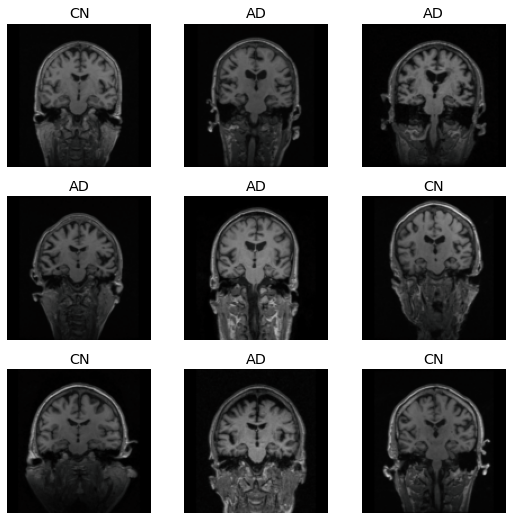

In [ ]:
dls.show_batch(max_n=9,unique=False)

In [ ]:
learn= cnn_learner(dls,resnet152, pretrained=True, metrics=[accuracy,error_rate])

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=1.5848931980144698e-06)

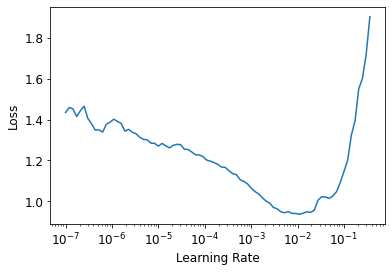

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(50,1.2e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.199598,1.734888,0.487500,0.512500,00:25


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.541524,1.495980,0.500000,0.500000,00:26
1,0.403837,1.563582,0.687500,0.312500,00:26
2,0.318744,0.826537,0.687500,0.312500,00:26
3,0.243366,0.703186,0.675000,0.325000,00:25
4,0.203131,0.748350,0.737500,0.262500,00:26
5,0.161118,0.774924,0.750000,0.250000,00:25
6,0.125278,0.794505,0.775000,0.225000,00:26
7,0.098902,0.742504,0.775000,0.225000,00:26
8,0.078818,0.739112,0.800000,0.200000,00:25
9,0.063275,0.864965,0.725000,0.275000,00:25


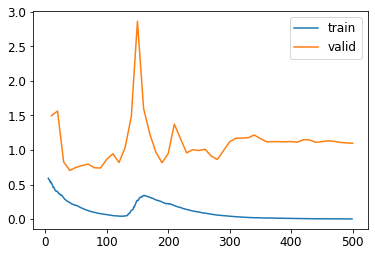

In [ ]:
learn.recorder.plot_loss()

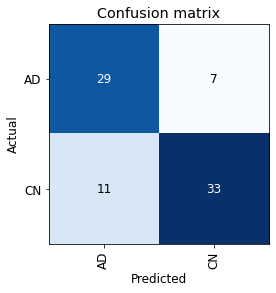

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.000350,1.257095,0.775000,0.225000,00:25


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.000021,1.296709,0.775000,0.225000,00:26
1,0.000083,1.285691,0.800000,0.200000,00:25
2,0.000142,2.043635,0.750000,0.250000,00:26
3,0.111351,5.592910,0.500000,0.500000,00:26
4,0.206973,2.257329,0.675000,0.325000,00:25
5,0.223291,1.675271,0.725000,0.275000,00:25
6,0.207218,1.399733,0.800000,0.200000,00:25
7,0.179899,1.051387,0.750000,0.250000,00:25
8,0.154743,1.127310,0.737500,0.262500,00:25
9,0.130056,1.189330,0.750000,0.250000,00:25


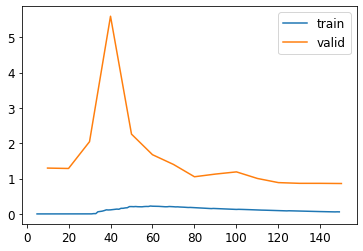

In [ ]:
learn.recorder.plot_loss()

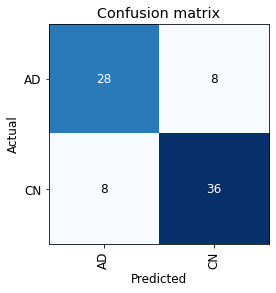

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()